In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.6/322.6 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 105.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.1 MB/s eta 0:00:00


In [11]:
import gradio as gr
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),       # перетворюємо 2D-зображення у вектор
    layers.Dense(128, activation='relu'),        # перший шар
    layers.Dropout(0.3),                         # Dropout для боротьби з переобученням
    layers.Dense(64, activation='relu'),         # другий шар
    layers.Dense(10, activation='softmax')       # вихідний шар (10 класів)
])

# Компілюємо модель
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Навчаємо модель
history = model.fit(train_images, train_labels, epochs=20,
                    validation_split=0.2, batch_size=32)

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7227 - loss: 0.7610 - val_accuracy: 0.8362 - val_loss: 0.4347
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8336 - loss: 0.4526 - val_accuracy: 0.8558 - val_loss: 0.3846
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8520 - loss: 0.4032 - val_accuracy: 0.8572 - val_loss: 0.3818
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8594 - loss: 0.3858 - val_accuracy: 0.8687 - val_loss: 0.3571
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8640 - loss: 0.3660 - val_accuracy: 0.8736 - val_loss: 0.3439
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8730 - loss: 0.3485 - val_accuracy: 0.8741 - val_loss: 0.3534
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8770 - loss: 0.3300 - val_accuracy: 0.8702 - val_loss: 0.3496
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8757 - loss: 0.33

In [ ]:
class_names = [
    "Футболка/топ", "Штани", "Светр", "Сукня", "Пальто",
    "Сандалі", "Сорочка", "Кросівки", "Сумка", "Чоботи"
]

def predict_drawing(img):
    import cv2
    img = cv2.resize(img, (28, 28))
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = 255 - img             # інверсія кольорів
    img = img / 255.0
    img = img.reshape(1, 28, 28)
    prediction = model.predict(img)
    return {class_names[i]: float(prediction[0][i]) for i in range(10)}



# Інтерфейс
iface = gr.Interface(
    fn=predict_drawing,
    inputs=gr.Image(image_mode='L'),
    outputs=gr.Label(num_top_classes=3),
    title="Fashion MNIST Розпізнавач",
    description="Намалюй одяг (наприклад футболку) і подивись, що передбачить модель"
)

iface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://30c9718019143ffebd.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


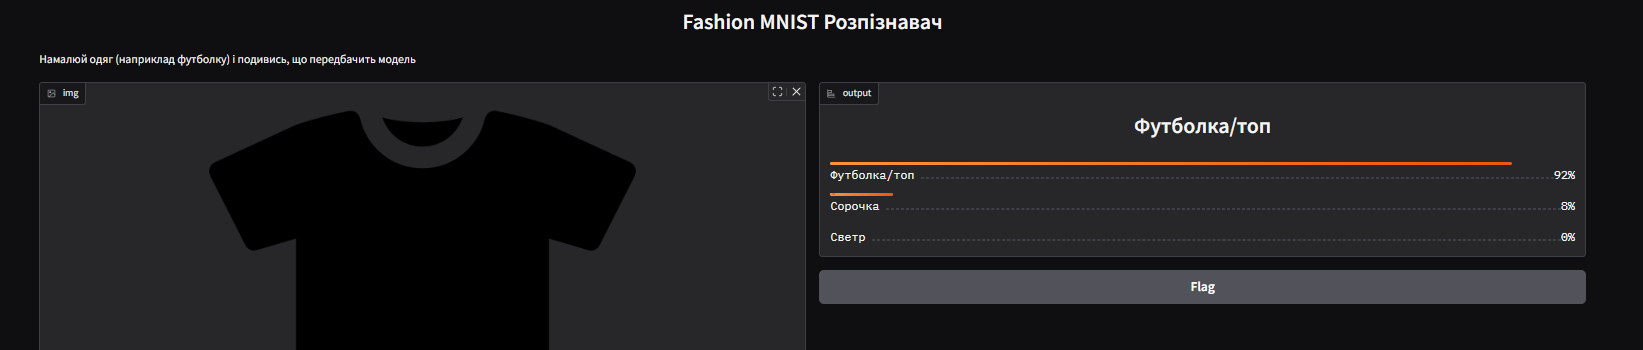